# Linear Regression using Gradient Discent

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import mean_squared_error
import pdb
from sklearn.datasets import load_boston
import matplotlib.animation as animation
import time
import math as m
import warnings
#warnings.filterwarnings('ignore')
boston = load_boston()
x=boston.data
y=boston.target

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 5)
scaler_x = preprocessing.StandardScaler().fit(x_train)
x_train = scaler_x.transform(x_train)
x = x_train
y=y_train

In [158]:
def predictxy(x,y,w,b):
    z=np.zeros(len(x))
    wt=np.transpose(w)
    for i in range(len(x)):
        z[i]=np.dot(x[i],w)+b
    return z

In [159]:
def plotxy(x,y,w,b):
    z=predictxy(x,y,w,b)
    plt.scatter(y,z)
    plt.xlabel("Real Prices")
    plt.ylabel("Predicted prices")
    plt.show()
    return z

In [160]:
def GradientDiscent(x,y,w,b,r):   
    n=x.shape[0]
    col=x.shape[1]
    wt=np.transpose(w)
    sw=np.zeros(col)
    sb=0
    #pdb.set_trace()
    for i in range(n):                  #  this loop is running for each row in data x
        z=-2*(y[i]-np.dot(x[i],wt)-b)   #  Note that this will give a scalar quantity
                                        #  culculating -2{(Yi-(WtXi+b)}
        sw+=z*x[i]                      #  culculating [Xi*-2{Yi-(WtXi+b)}] Note that this will give a vector. 
                                        #  This will give partial dervative of [y-(wx+b)]^2 w-r-t (W)
        sb+=z                           #  This will give partial dervative of [y-(wx+b)]^2 w-r-t (b)
        #pdb.set_trace()
    sw=sw/n
    sb=sb/n
    return sw,sb  

In [161]:
def get_optimal_W_and_B_Using_GradientDiscent(x,y):
    
    col=x.shape[1]
    #w = np.random.rand(col)
    w = np.random.normal(0,1,col)
    b = np.random.random()
    r=.1                                    # Learning Rate
    for j in range(6000):                   # No of epoch
        w_old=w
        b_old=b
        w,b=GradientDiscent(x,y,w,b,r)      # X is the data  , Y is House Sales value,  W is the weight vector we are trying to train,  r is the step size in gradient discent
        w=w*r                              # r*(dl/dw)  here w contains the value of dl/dw
        w=w_old-w                          # update w as wi-r*(dl/dw) 
        b=b*r                              # r*(dl/db)  here b contains the value of dl/db
        b=b_old-b                          # update b as bi-r*(dl/db)
        #r=r/2
        #pdb.set_trace()
        if(sum(w-w_old)>-.001 and sum(w-w_old)<.001):# difference between old weights and new weights should lie b/w(-.01 to .01)
            print("Threshod condition satisfied and below is the output\nNote That Threshold Condiftion is:\ndifference between old weights and new weights should lie b/w(-.01 to .01)\n")
            break;
    return w,w_old,b


In [162]:
w,w_old,b=get_optimal_W_and_B_Using_GradientDiscent(x,y)


Threshod condition satisfied and below is the output
Note That Threshold Condiftion is:
difference between old weights and new weights should lie b/w(-.01 to .01)



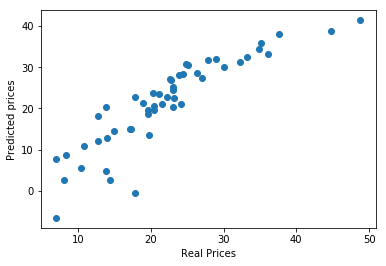

In [163]:
z_test=plotxy(scaler_x.transform(x_test),y_test,w,b)

In [164]:
print("MSE ON Test Data:  ",mean_squared_error(y_test, z_test))

MSE ON Test Data:   24.688456492580578


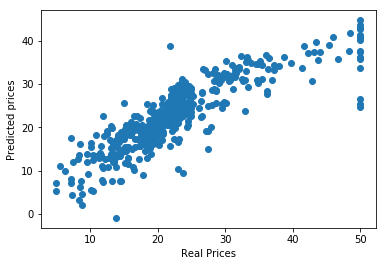

In [165]:
z_train=plotxy(x_train,y_train,w,b)

In [166]:
print("MSE ON Train Data:  ",mean_squared_error(y_train, z_train))

MSE ON Train Data:   21.862390396482365


# Linear Regression using Stochastic Gradient Discent

In [169]:
def get_optimal_W_and_B_Using_StocasticGradientDiscent(x,y):
    
    col=x.shape[1]
    n=x.shape[0]
    w = np.random.normal(0,1,col)
    b = np.random.random()
    r=.1                                    # Learning Rate
    for j in range(6000):                   # No of epoch
        
        idx = np.random.randint(n, size=50)    #Select 50 row indexes randomly from dataset x in each iteration
        random_x=x[idx,:]
        random_y=y[idx]
        w_old=w
        b_old=b
        w,b=GradientDiscent(random_x,random_y,w,b,r)      # X is the data  , Y is House Sales value,  W is the weight vector we are trying to train,  r is the step size in gradient discent
        w=w*r                              # r*(dl/dw)  here w contains the value of dl/dw
        w=w_old-w                          # update w as wi-r*(dl/dw) 
        b=b*r                              # r*(dl/db)  here b contains the value of dl/db
        b=b_old-b                          # update b as bi-r*(dl/db)
        #r=r/2
        #pdb.set_trace()
        if(sum(w-w_old)>-.001 and sum(w-w_old)<.001):# difference between old weights and new weights should lie b/w(-.01 to .01)
            print("Threshod condition satisfied and below is the output\nNote That Threshold Condiftion is:\ndifference between old weights and new weights should lie b/w(-.01 to .01)\n")
            break;
    return w,w_old,b

In [170]:
w,w_old,b=get_optimal_W_and_B_Using_StocasticGradientDiscent(x,y)

Threshod condition satisfied and below is the output
Note That Threshold Condiftion is:
difference between old weights and new weights should lie b/w(-.01 to .01)



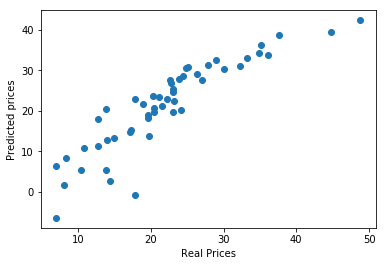

In [171]:
z_test=plotxy(scaler_x.transform(x_test),y_test,w,b)   #z_test contains predicted house sales values for test data

In [172]:
print("MSE ON Test Data:  ",mean_squared_error(y_test, z_test))

MSE ON Test Data:   24.723068006661997


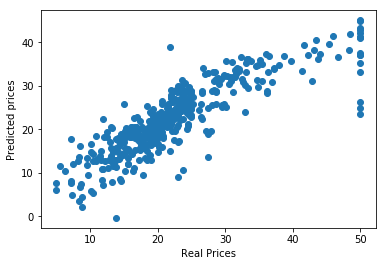

In [173]:
z_train=plotxy(x_train,y_train,w,b)         #z_train contains predicted house sales values for train data

In [174]:
print("MSE ON Train Data:  ",mean_squared_error(y_train, z_train))

MSE ON Train Data:   21.997375679895864


# Now lets use scikit learn's inbuilt linear regression modal and compare the result that we have received above

In [177]:
from sklearn.linear_model import LinearRegression
lnrg = LinearRegression()
lnrg.fit(x,y)
y_pred = lnrg.predict(scaler_x.transform(x_test))

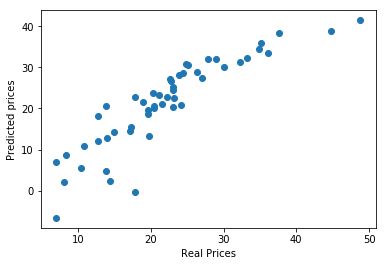

In [178]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Prices")
plt.ylabel("Predicted prices")
plt.show()

In [179]:
print("MSE ON Test Data:  ",mean_squared_error(y_test, y_pred))

MSE ON Test Data:   24.86338945239887


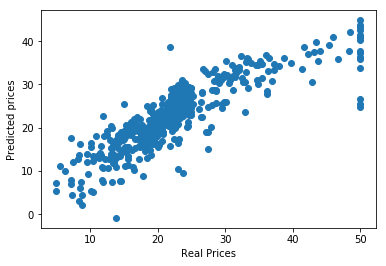

In [180]:
ytrain_pred = lnrg.predict(x_train)
plt.scatter(y_train, ytrain_pred)
plt.xlabel("Real Prices")
plt.ylabel("Predicted prices")
plt.show()

In [181]:
print("MSE ON Train Data:  ",mean_squared_error(y, ytrain_pred))

MSE ON Train Data:   21.84340046018602
